In [1]:
import numpy as np
def generate_sample():
    # Generate random (x, y) coordinates within the 50x50 grid
    x = np.random.randint(0, 50)
    y = np.random.randint(0, 50)
    
    # Create a 50x50 image with all pixels set to 0
    image = np.zeros((50,50))
    
    # Set the pixel at the random coordinates to 255
    image[x, y] = 255
    
    return image, (x, y)

# Generate dataset with 1000 samples
num_samples = 1000
dataset = [generate_sample() for _ in range(num_samples)]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2)
    ])
    return model

model = create_model()
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)        

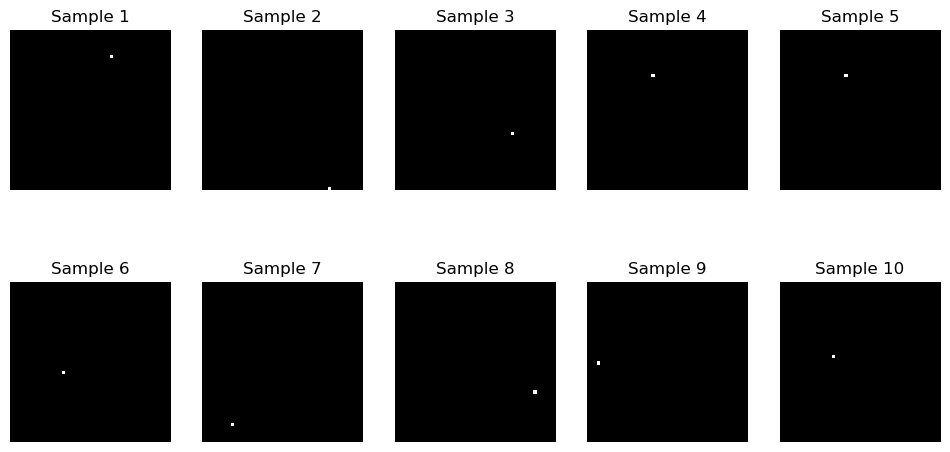


Epoch 1/20


25/25 [==============================] - 2s 27ms/step - loss: 588.3116 - mae: 19.0490 - val_loss: 369.0707 - val_mae: 12.7061
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 320.3385 - mae: 11.1746 - val_loss: 281.0912 - val_mae: 9.8697
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 265.9315 - mae: 9.0716 - val_loss: 248.0370 - val_mae: 8.4727
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 240.7666 - mae: 8.0935 - val_loss: 224.9758 - val_mae: 8.2624
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 214.5240 - mae: 7.7061 - val_loss: 190.5128 - val_mae: 7.6485
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 167.5520 - mae: 7.1006 - val_loss: 120.9171 - val_mae: 6.4886
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 95.8395 - mae: 6.0867 - val_loss: 81.9019 - val_mae: 6.4237
Epoch 8/20
25/25 [==============================] -

In [4]:
# Split dataset into training and validation sets
import matplotlib.pyplot as plt

train_ratio = 0.8
train_size = int(train_ratio * num_samples)

train_images = np.array([sample[0] for sample in dataset[:train_size]])
train_labels = np.array([sample[1] for sample in dataset[:train_size]])

val_images = np.array([sample[0] for sample in dataset[train_size:]])
val_labels = np.array([sample[1] for sample in dataset[train_size:]])

# Displaying the first 10 training images 
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(50, 50), cmap='gray')
    plt.title(f"Sample {i+1}")
    plt.axis('off')
plt.show()

train_images = train_images.reshape(-1, 50, 50, 1)
val_images = val_images.reshape(-1, 50, 50, 1)

# Compile and train the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(val_images, val_labels))


7/7 [==============================] - 0s 6ms/step - loss: 40.9195 - mae: 3.7067
Test Loss: 40.91952133178711, Test MAE: 3.7066845893859863
7/7 [==============================] - 0s 6ms/step


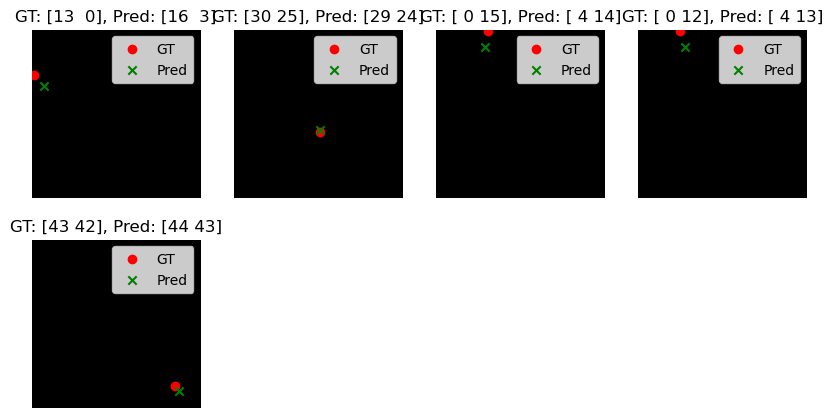

In [5]:
# Evaluate model on test set
test_loss, test_mae = model.evaluate(val_images, val_labels)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict coordinates on validation set
predictions = model.predict(val_images)

# Visualize GT and Predicted points
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 4, i+1)
    plt.imshow(val_images[i].reshape(50, 50), cmap='gray')
    plt.title(f"GT: {val_labels[i]}, Pred: {predictions[i].astype(int)}")
    plt.scatter(val_labels[i][1], val_labels[i][0], c='r', marker='o', label='GT')  # GT point
    plt.scatter(predictions[i][1], predictions[i][0], c='g', marker='x', label='Pred')  # Predicted point
    plt.legend()
    plt.axis('off')
plt.show()
